In this workbook, I have calculated the summary of the clusters which can be used analysed for the business use. 

For example, we have three segements of clients belonging to different income categories

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

## **Table Gen_members_all**

In [ ]:
# Import the dataset 
#df1 = pd.read_csv("Dataset_R&C.csv")
df1 = pd.read_excel("Dataset_R&C.xlsx")
df1.head(4)
df1.shape

,Client ID Number,Campaign Response,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Revenue_balance interest,Revenue_interchange,Revenue_Annual Fee,Cost_Rewards,Cost_Incentive,Cost_Fund_assume3%,Total_Revenue,Total_Cost,Profit
0,768805383,Did Not Respond,45,M,High School,Married,$60K - $80K,Rewards Basic,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,155.32,14.30,0,4.09,25.00,23.31,169.62,52.40,117.23
1,818770008,Did Not Respond,49,F,Graduate,Single,Less than $40K,Rewards Basic,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,172.71,16.14,0,4.61,25.00,25.92,188.85,55.53,133.32
2,713982108,Did Not Respond,51,M,Graduate,Married,$80K - $120K,Rewards Basic,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,23.59,0,6.74,25.00,0.00,23.59,31.74,-8.15
3,769911858,Did Not Respond,40,F,High School,Unknown,Less than $40K,Rewards Basic,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,503.15,14.64,0,4.18,25.00,75.51,517.79,104.69,413.09


(10127, 29)

In [ ]:
pie = pd.DataFrame(df1["Campaign Response"].value_counts())

In [ ]:
pie

,Campaign Response
Did Not Respond,8500
Did Respond,1627


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dbc8d7310>],
      dtype=object)

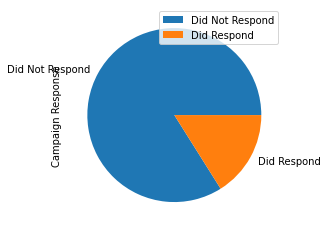

In [ ]:
pie.plot.pie(subplots=True)

In [ ]:
subset = ['Customer_Age','Gender','Education_Level','Marital_Status',
          'Income_Category','Card_Category','Total_Relationship_Count',
          'Months_Inactive_12_mon',
          'Credit_Limit','Total_Revolving_Bal',
          'Total_Trans_Amt','Total_Trans_Ct',
          'Profit', 'Avg_Utilization_Ratio']

In [ ]:
df = df1.loc[:,subset]

In [ ]:
df.head(1)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Profit,Avg_Utilization_Ratio
0,45,M,High School,Married,$60K - $80K,Rewards Basic,5,1,12691.00,777,1144,42,117.23,0.06


In [ ]:
df.Education_Level.value_counts()


Graduate         3128
High School      2013
Unknown          1519
University       1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df.loc[df.Education_Level.isnull(), :].head(5)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Profit,Avg_Utilization_Ratio
4,40,M,NaN,Married,$60K - $80K,Rewards Basic,5,1,4716.00,0,816,28,-17.71,0.00
8,37,M,NaN,Single,$60K - $80K,Rewards Basic,5,2,22352.00,2517,1350,24,414.69,0.11
10,42,M,NaN,Unknown,$120K +,Rewards Basic,5,3,6748.00,1467,1201,42,234.97,0.22
28,44,F,NaN,Single,Unknown,Rewards Basic,5,2,10100.00,0,1052,18,-15.61,0.00
31,53,M,NaN,Married,$60K - $80K,Rewards Basic,2,5,2451.00,1690,1596,26,276.38,0.69


In [ ]:
## Fill the null values 
df.fillna(value='Null', axis=0,inplace=True)

In [ ]:
df.isnull().sum()

Customer_Age                0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Ct              0
Profit                      0
Avg_Utilization_Ratio       0
dtype: int64

**Data Preprocessing**

In [ ]:
# Categorical and numerical features
cat_cols = list(df.select_dtypes("object").columns)
num_cols = list(df.select_dtypes(exclude="object").columns)

In [ ]:
cat_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
### Preprocessing the numerical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
ohe = OneHotEncoder()

Column_trans = ColumnTransformer(
     [('scale', scaler, num_cols),
      ('Onehot', ohe, cat_cols),
      ],
     remainder='passthrough')
preprocessor = Pipeline(
    [('features', Column_trans)

     ])


**Model buidling**

In [ ]:
K = 3
clusterer = Pipeline(
    [("kmeans", 
        KMeans(n_clusters=K, random_state=1)
    )]
)
pipe = Pipeline([("preprocessor", preprocessor), 
                 ("clusterer", clusterer)])

In [ ]:
## Fit the Data

pipe.fit(df)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('features',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='passthrough',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True),
                                                                   ['Customer_Age',
                                                                    'Total_Relationship_Count',
                     

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(df)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.17021843765404265

In [ ]:
### Find out the Outliers
df_new = df.copy(deep=True)
df_new["predicted_label"]  = pipe["clusterer"]["kmeans"].labels_
## Drop this outlier index 361

## **Cluster Interpretation**

**Features mean for each clusters**

In [ ]:
df_new.head()

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Profit,Avg_Utilization_Ratio,predicted_label
0,45,M,High School,Married,$60K - $80K,Rewards Basic,5,1,12691.00,777,1144,42,117.23,0.06,1
1,49,F,Graduate,Single,Less than $40K,Rewards Basic,6,1,8256.00,864,1291,33,133.32,0.10,1
2,51,M,Graduate,Married,$80K - $120K,Rewards Basic,4,1,3418.00,0,1887,20,-8.15,0.00,1
3,40,F,High School,Unknown,Less than $40K,Rewards Basic,3,4,3313.00,2517,1171,20,413.09,0.76,0
4,40,M,Null,Married,$60K - $80K,Rewards Basic,5,1,4716.00,0,816,28,-17.71,0.00,1


In [ ]:
num_cols

['Customer_Age',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Profit',
 'Avg_Utilization_Ratio']

In [ ]:
### Numerical Features Cluster Mean Values
index = list(df[num_cols])
clus_summary = pd.DataFrame(index=index, columns=["Cluster 1", "Cluster 2", "Cluster 3"])
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

for i, label in enumerate(set(predicted_labels)):
    clus_summary.iloc[:,i] = df_new[df_new.predicted_label==label].mean(axis=0)

clus_summary["All Data"] = df_new.mean(axis=0)
clus_summary

,Cluster 1,Cluster 2,Cluster 3,All Data
Customer_Age,46.47,46.38,45.58,46.33
Total_Relationship_Count,4.12,3.93,2.20,3.81
Months_Inactive_12_mon,2.31,2.43,2.21,2.34
Credit_Limit,5761.29,9926.94,16445.37,8631.95
Total_Revolving_Bal,1690.74,335.75,1472.09,1162.81
Total_Trans_Amt,3381.47,3326.10,11751.69,4404.09
Total_Trans_Ct,61.05,57.97,100.76,64.86
Profit,293.43,63.86,330.76,213.25
Avg_Utilization_Ratio,0.47,0.04,0.16,0.27


In [ ]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

**Categorical Feature Value count**

In [ ]:
### Categorical Features Cluster Summary
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

if len(cat_cols) > 0:
  for cat_col in cat_cols:
    for i, label in enumerate(set(predicted_labels)):
      valuecount = df_new[df_new.predicted_label==label][cat_col].value_counts()
      percentage = (valuecount / sum(valuecount)) * 100
      values = pd.concat([valuecount,percentage], axis=1)
      print(f"Cluster {i+1}")
      values.rename(columns={0:"Count", 1:"Percentage"})


Cluster 1


,Gender,Gender
F,3110,60.71
M,2013,39.29


Cluster 2


,Gender,Gender
M,1939,51.82
F,1803,48.18


Cluster 3


,Gender,Gender
M,817,64.74
F,445,35.26


Cluster 1


,Education_Level,Education_Level
Graduate,1541,30.08
High School,1049,20.48
Unknown,781,15.24
Null,760,14.84
University,509,9.94
Post-Graduate,266,5.19
Doctorate,217,4.24


Cluster 2


,Education_Level,Education_Level
Graduate,1183,31.61
High School,717,19.16
Unknown,555,14.83
Null,528,14.11
University,391,10.45
Post-Graduate,185,4.94
Doctorate,183,4.89


Cluster 3


,Education_Level,Education_Level
Graduate,404,32.01
High School,247,19.57
Null,199,15.77
Unknown,183,14.50
University,113,8.95
Post-Graduate,65,5.15
Doctorate,51,4.04


Cluster 1


,Marital_Status,Marital_Status
Married,2518,49.15
Single,1882,36.74
Divorced,370,7.22
Unknown,353,6.89


Cluster 2


,Marital_Status,Marital_Status
Married,1631,43.59
Single,1543,41.23
Unknown,287,7.67
Divorced,281,7.51


Cluster 3


,Marital_Status,Marital_Status
Married,538,42.63
Single,518,41.05
Unknown,109,8.64
Divorced,97,7.69


Cluster 1


,Income_Category,Income_Category
Less than $40K,2140,41.77
$40K - $60K,1015,19.81
$60K - $80K,593,11.58
$80K - $120K,588,11.48
Unknown,535,10.44
$120K +,252,4.92


Cluster 2


,Income_Category,Income_Category
Less than $40K,1123,30.01
$80K - $120K,665,17.77
$60K - $80K,591,15.79
$40K - $60K,573,15.31
Unknown,469,12.53
$120K +,321,8.58


Cluster 3


,Income_Category,Income_Category
Less than $40K,298,23.61
$80K - $120K,282,22.35
$60K - $80K,218,17.27
$40K - $60K,202,16.01
$120K +,154,12.20
Unknown,108,8.56


Cluster 1


,Card_Category,Card_Category
Rewards Basic,4991,97.42
Avion Visa Infinite,110,2.15
World Elite MasterCard,20,0.39
Visa Infinite Privilege,2,0.04


Cluster 2


,Card_Category,Card_Category
Rewards Basic,3502,93.59
Avion Visa Infinite,213,5.69
World Elite MasterCard,23,0.61
Visa Infinite Privilege,4,0.11


Cluster 3


,Card_Category,Card_Category
Rewards Basic,943,74.72
Avion Visa Infinite,232,18.38
World Elite MasterCard,73,5.78
Visa Infinite Privilege,14,1.11


In [ ]:
#pd.set_option("display.precision", 2)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

#print('All Data:')
#print('Number of Instances: {}'.format(df[num_cols].shape[0]))
#all_summary = df.describe(exclude="O").T
#all_summary.iloc[:,1:]

x = pd.DataFrame()
for i, label in enumerate(set(predicted_labels)):
  d = df_new[df_new.predicted_label==label]

  x.loc[:,label] = d.describe(exclude='O').iloc[1:,0:len(num_cols)].T.iloc[:,0]
print(x)

                               0       1        2
Customer_Age               46.47   46.38    45.58
Total_Relationship_Count    4.12    3.93     2.20
Months_Inactive_12_mon      2.31    2.43     2.21
Credit_Limit             5761.29 9926.94 16445.37
Total_Revolving_Bal      1690.74  335.75  1472.09
Total_Trans_Amt          3381.47 3326.10 11751.69
Total_Trans_Ct             61.05   57.97   100.76
Profit                    293.43   63.86   330.76
Avg_Utilization_Ratio       0.47    0.04     0.16


**More details on the clusters**

In [ ]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(df[num_cols].shape[0]))
all_summary = df.describe(exclude="O").T
all_summary.iloc[:,1:]

for i, label in enumerate(set(predicted_labels)):
  print(f'\nCluster {label+1}')
  print(f"\nNumber of Instances: {sum(df_new.predicted_label==label)}")
  d = df_new[df_new.predicted_label==label]
  d.describe(exclude='O').iloc[1:,0:len(num_cols)].T

All Data:
Number of Instances: 10127


,mean,std,min,25%,50%,75%,max
Customer_Age,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Total_Relationship_Count,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Credit_Limit,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Total_Trans_Amt,4404.09,3397.13,510.00,2155.50,3899.00,4741.00,18484.00
Total_Trans_Ct,64.86,23.47,10.00,45.00,67.00,81.00,139.00
Profit,213.25,143.90,-20.45,93.96,231.82,322.97,660.14
Avg_Utilization_Ratio,0.27,0.28,0.00,0.02,0.18,0.50,1.00



Cluster 1

Number of Instances: 5123


,mean,std,min,25%,50%,75%,max
Customer_Age,46.47,8.28,26.00,41.00,46.00,52.00,73.00
Total_Relationship_Count,4.12,1.44,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,2.31,1.02,0.00,2.00,2.00,3.00,6.00
Credit_Limit,5761.29,6068.75,1438.30,2427.00,3230.00,6470.50,34516.00
Total_Revolving_Bal,1690.74,481.21,604.00,1338.50,1664.00,2035.00,2517.00
Total_Trans_Amt,3381.47,1449.25,569.00,1984.50,3739.00,4494.00,10294.00
Total_Trans_Ct,61.05,19.53,12.00,44.00,65.00,77.00,103.00
Profit,293.43,81.36,100.34,234.31,287.18,352.93,518.00
Avg_Utilization_Ratio,0.47,0.24,0.04,0.26,0.49,0.67,1.00



Cluster 2

Number of Instances: 3742


,mean,std,min,25%,50%,75%,max
Customer_Age,46.38,7.82,26.00,41.00,46.00,52.00,66.00
Total_Relationship_Count,3.93,1.48,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,2.43,1.01,0.00,2.00,2.00,3.00,6.00
Credit_Limit,9926.94,9728.49,1438.30,2374.25,5927.00,13978.25,34516.00
Total_Revolving_Bal,335.75,475.67,0.00,0.00,0.00,753.75,1763.00
Total_Trans_Amt,3326.10,1663.89,510.00,2036.25,3195.00,4388.50,10583.00
Total_Trans_Ct,57.97,19.49,10.00,41.00,61.00,74.00,103.00
Profit,63.86,81.56,-20.45,-0.97,17.45,133.30,338.17
Avg_Utilization_Ratio,0.04,0.08,0.00,0.00,0.00,0.06,0.49



Cluster 3

Number of Instances: 1262


,mean,std,min,25%,50%,75%,max
Customer_Age,45.58,7.43,26.00,41.00,46.00,51.00,63.00
Total_Relationship_Count,2.20,1.21,1.00,1.00,2.00,3.00,6.00
Months_Inactive_12_mon,2.21,0.97,1.00,1.00,2.00,3.00,6.00
Credit_Limit,16445.37,11550.22,2019.00,6130.75,12925.00,27718.00,34516.00
Total_Revolving_Bal,1472.09,681.15,0.00,1133.25,1532.50,1950.00,2517.00
Total_Trans_Amt,11751.69,3768.31,2421.00,8034.00,13645.00,14878.75,18484.00
Total_Trans_Ct,100.76,16.09,49.00,90.00,101.00,114.00,139.00
Profit,330.76,116.14,19.73,263.22,336.90,413.98,660.14
Avg_Utilization_Ratio,0.16,0.16,0.00,0.05,0.10,0.22,0.80
